In [2]:
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

In [3]:
# Load the stored data object
save_file = './data/results/qc_tutorial_2.h5ad'
adata = sc.read_h5ad(save_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
print(adata.X.shape)

(32478, 4313)


In [6]:
adata2 = adata.raw.to_adata()   #logtransformed and normalized 

# check that the matrix looks like noramlized counts
print(adata2.X[1:10,1:10])

  (0, 8)	1.5870976
  (2, 8)	1.0337517
  (3, 6)	1.1536268
  (4, 7)	0.40967566
  (5, 6)	1.5439905
  (6, 6)	0.5927901
  (6, 8)	0.3396916


In [7]:
var_genes_all = adata.var.highly_variable

In [8]:
print("Highly variable genes: %d"%sum(var_genes_all))

Highly variable genes: 4313


In [9]:
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'sample')

각 sample 안에서 variable 한 gene 을 찾는 것이 중요하다. 위에서 batch_key = 'sample' 는 그렇게 하게 도와준다. 

In [10]:
print("Highly variable genes intersection: %d"%sum(adata2.var.highly_variable_intersection))

Highly variable genes intersection: 6


In [11]:
print("Number of batches where gene is variable:")
print(adata2.var.highly_variable_nbatches.value_counts())

Number of batches where gene is variable:
0     4610
1     2355
4     2067
2     2020
3     1947
5     1946
6     1879
7     1612
8     1419
9     1098
10     757
11     550
12     333
13     222
14     140
15      86
16      54
17      31
18      12
19       6
Name: highly_variable_nbatches, dtype: int64


In [12]:
var_genes_batch = adata2.var.highly_variable_nbatches > 0

In [13]:
print("Any batch var genes: %d"%sum(var_genes_batch))


Any batch var genes: 18534


In [14]:
print("All data var genes: %d"%sum(var_genes_all))

All data var genes: 4313


In [15]:
print("Overlap: %d"%sum(var_genes_batch & var_genes_all))


Overlap: 4302


In [16]:
print("Variable genes in all batches: %d"%sum(adata2.var.highly_variable_nbatches == 19))

Variable genes in all batches: 6


In [17]:
print("Overlap batch instersection and all: %d"%sum(var_genes_all & adata2.var.highly_variable_intersection))

Overlap batch instersection and all: 6


In [45]:
var_select = adata2.var.highly_variable_nbatches > 2
len(var_genes)

14159

In [47]:
batches

['OC4',
 'OC10',
 'OC12',
 'OC15',
 'SING_52',
 'SING_56',
 'SING_57',
 'SING_60',
 'SING_62',
 'SING_64',
 'SING_65',
 'SING_67',
 'SING_68',
 'SING_69',
 'SING_71',
 'SING_72',
 'SING_74',
 'SING_76',
 'SING_77']

In [46]:
# split per batch into new objects.
batches = adata.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata2[adata2.obs['sample'] == batch,]

alldata    

{'OC4': View of AnnData object with n_obs × n_vars = 920 × 23144
     obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
     var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
     uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
     obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial',
 'OC10': View of AnnData object with n_obs × n_vars = 1737 × 23144
     obs:

In [56]:
cdata = sc.external.pp.mnn_correct(alldata[batches[0]],alldata[batches[1]],alldata[batches[2]],
                                   alldata[batches[3]],alldata[batches[4]],alldata[batches[5]],
                                   alldata[batches[6]],alldata[batches[7]],alldata[batches[8]],
                                   alldata[batches[9]],alldata[batches[10]],alldata[batches[11]],
                                   alldata[batches[12]],alldata[batches[13]],alldata[batches[14]],
                                   alldata[batches[15]],alldata[batches[16]],alldata[batches[17]],
                                   alldata[batches[18]],                                   
                                   svd_dim = 50, batch_key = 'sample', save_raw = True, var_subset = var_genes)


/home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7f04e0116dc0>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2351.
    With argument(s): '(x=array(float32, 2d, A), axis=int64)':
   Rejected as the implementation raised a specific error:
     TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/ubuntu/pyenv/lib/python3.8/site-packages/numba/core/typing/templates.py:775

During: resolving callee type: Function(<function norm at 0x7f04e0116dc0>)
During: typing of call at /home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py (16)


File "../pyenv/lib/python3.8/site

Performing cosine normalization...


/home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7f04e0116dc0>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
    - Of which 2 did not match due to:
    Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2351.
      With argument(s): '(x=array(float32, 2d, A), axis=int64)':
     Rejected as the implementation raised a specific error:
       TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/ubuntu/pyenv/lib/python3.8/site-packages/numba/core/typing/templates.py:775

During: resolving callee type: Function(<function norm at 0x7f04e0116dc0>)
During: typing of call at /home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py (16)


File "../pyenv/lib/pyth

Starting MNN correct iteration. Reference batch: 0
Step 1 of 18: processing batch 1
  Looking for MNNs...


/home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py:88: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "find_mutual_nn" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py (94)

File "../pyenv/lib/python3.8/site-packages/mnnpy/utils.py", line 94:
def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    <source elided>
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
    ^

  @jit((float32[:, :], float32[:, :], int8, int8, int8))
/home/ubuntu/pyenv/lib/python3.8/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "find_mutual_nn" was compiled in object mode without forceobj=True.

File "../pyenv/lib/python3.8/site-packages/mnnpy/utils.py", line 94:
def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    <source elided>
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
    ^

  warnings.war

  Computing correction vectors...


/home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py:102: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "compute_correction" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/ubuntu/pyenv/lib/python3.8/site-packages/mnnpy/utils.py (107)

File "../pyenv/lib/python3.8/site-packages/mnnpy/utils.py", line 107:
def compute_correction(data1, data2, mnn1, mnn2, data2_or_raw2, sigma):
    <source elided>
    vect_reduced = np.zeros((data2.shape[0], vect.shape[1]), dtype=np.float32)
    for index, ve in zip(mnn2, vect):
    ^

  @jit(float32[:, :](float32[:, :], float32[:, :], int32[:], int32[:], float32[:, :], float32))
/home/ubuntu/pyenv/lib/python3.8/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "compute_correction" was compiled in object mode without forceobj=True.

File "../pyenv/lib/python3.8/site-packages/mnnpy/utils.py", line 107:
def compute_correctio

  Removing components...
  Adjusting variance...
  Applying correction...
Step 2 of 18: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Removing components...
  Adjusting variance...
  Applying correction...
Step 3 of 18: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Removing components...
  Adjusting variance...
  Applying correction...
Step 4 of 18: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Removing components...
  Adjusting variance...
  Applying correction...
Step 5 of 18: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Removing components...
  Adjusting variance...
  Applying correction...
Step 6 of 18: processing batch 6
  Looking for MNNs...
  Computing correction vectors...
  Removing components...
  Adjusting variance...
  Applying correction...
Step 7 of 18: processing batch 7
  Looking for MNNs...
  Computing correction vectors...
  Removing components.

In [55]:
batches[19]

IndexError: list index out of range

In [58]:
corr_data = cdata[0][:,var_genes]
corr_data.X.shape

(32478, 14159)

/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


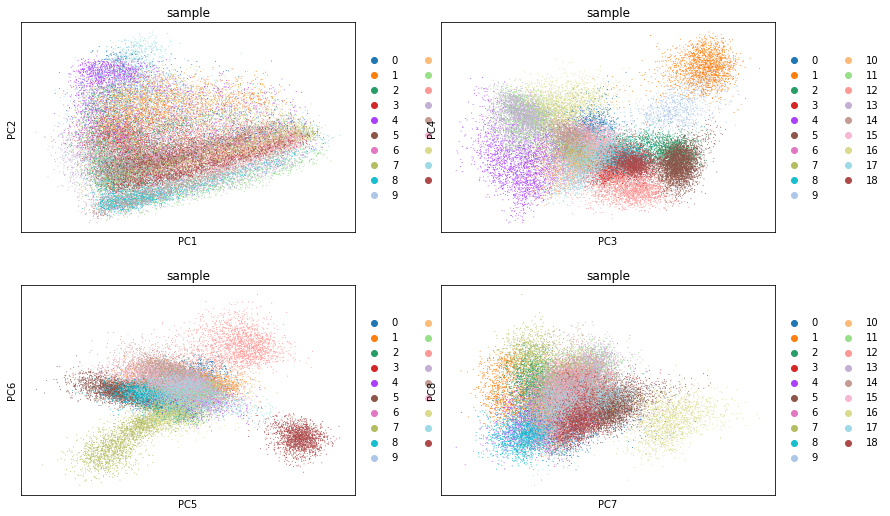

/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [59]:
# the variable genes defined are used by default by the pca function, 
# now we want to run on all the genes in the dataset
sc.tl.pca(corr_data, svd_solver = 'arpack', use_highly_variable = False)
sc.pl.pca(corr_data, components = ['1,2','3,4','5,6','7,8'], ncols=2, color='sample')


# tSNE
sc.tl.tsne(corr_data, n_pcs = 50)
# UMAP, first with neighbor calculation 
sc.pp.neighbors(corr_data, n_pcs = 50, n_neighbors = 20)
sc.tl.umap(corr_data)

<AxesSubplot:title={'center':'Uncorrected umap'}, xlabel='UMAP1', ylabel='UMAP2'>

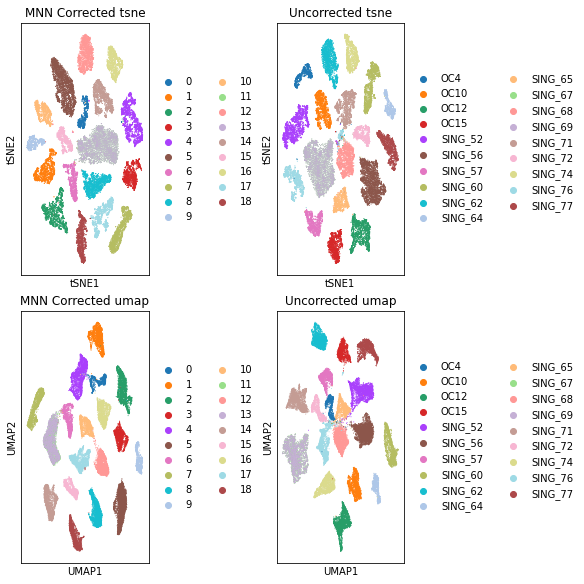

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(8,8),constrained_layout=True)
sc.pl.tsne(corr_data, color="sample", title="MNN Corrected tsne", ax=axs[0,0], show=False)
sc.pl.tsne(adata, color="sample", title="Uncorrected tsne", ax=axs[0,1], show=False)
sc.pl.umap(corr_data, color="sample", title="MNN Corrected umap", ax=axs[1,0], show=False)
sc.pl.umap(adata, color="sample", title="Uncorrected umap", ax=axs[1,1], show=False)

In [61]:
save_file = './data/results/scanpy_mnn_corrected_ov_visium.h5ad'
corr_data.write_h5ad(save_file)